In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Load cleaned dataset
df = pd.read_csv("/content/canada_hospital_inpatient_clean_1995_2024.csv")

In [21]:
# Ontario only
ontario = df[df["Province_Territory"] == "Ontario"]

ontario.head()

,Fiscal_Year,Province_Territory,Age_Group,Sex,Number_of_Discharges,Total_Length_of_Stay_Days,Average_Length_of_Stay_Days
300,2023–2024,Ontario,00–04,All,44641.0,223893.0,5.015412
301,2023–2024,Ontario,00–04,Female,19363.0,98408.0,5.082270
302,2023–2024,Ontario,00–04,Male,25273.0,125468.0,4.964508
303,2023–2024,Ontario,05–09,All,14253.0,46338.0,3.251105
304,2023–2024,Ontario,05–09,Female,6303.0,21368.0,3.390132


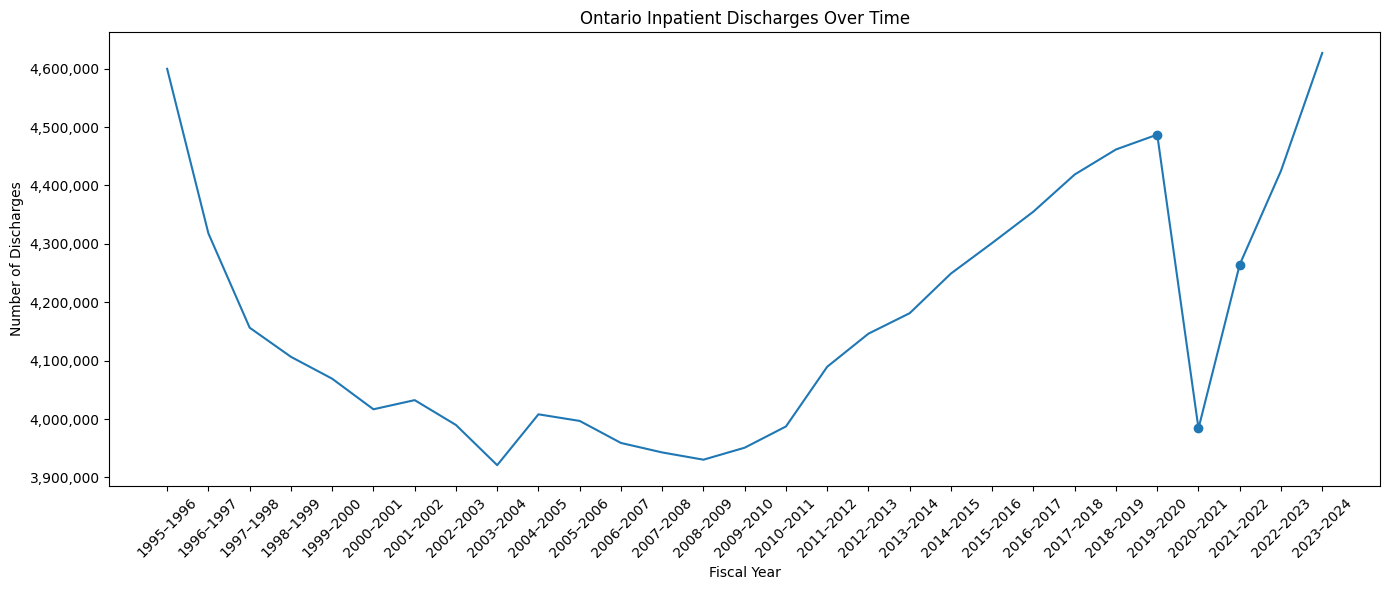

In [22]:
# Aggregate to yearly discharges
ontario_yearly = (
    ontario.groupby("Fiscal_Year", as_index=False)["Number_of_Discharges"]
    .sum()
)

# Mark COVID years
ontario_yearly["Period"] = "Baseline"
ontario_yearly.loc[ontario_yearly["Fiscal_Year"].isin(["2019–2020", "2020–2021", "2021–2022"]), "Period"] = "COVID"

# Plot Ontario trend
plt.figure(figsize=(14,6))
plt.plot(
    ontario_yearly["Fiscal_Year"],
    ontario_yearly["Number_of_Discharges"],
    label="Ontario"
)

# Shade COVID period
covid_mask = ontario_yearly["Period"] == "COVID"
plt.scatter(
    ontario_yearly.loc[covid_mask, "Fiscal_Year"],
    ontario_yearly.loc[covid_mask, "Number_of_Discharges"],
)

plt.title("Ontario Inpatient Discharges Over Time")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Discharges")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
plt.tight_layout()
plt.show()

In [23]:
ontario_yearly

,Fiscal_Year,Number_of_Discharges,Period
0,1995–1996,4599716.0,Baseline
1,1996–1997,4317908.0,Baseline
2,1997–1998,4156508.0,Baseline
3,1998–1999,4106644.0,Baseline
4,1999–2000,4069144.0,Baseline
5,2000–2001,4016800.0,Baseline
6,2001–2002,4032472.0,Baseline
7,2002–2003,3989936.0,Baseline
8,2003–2004,3921140.0,Baseline
9,2004–2005,4008164.0,Baseline


##Ontario inpatient discharges over time

The chart shows how inpatient discharges in Ontario have changed over nearly three decades. Discharges decline steadily from the mid-1990s into the early 2000s, reaching a low point around 2003–2004. From the late 2000s onward, volumes increase gradually and consistently, indicating sustained growth in inpatient demand under normal conditions.

The sharp drop observed in 2019–2021 coincides with the COVID-19 pandemic, reflecting delayed procedures, reduced admissions, and emergency operating protocols rather than a fall in underlying healthcare need. Following this period, discharges rebound strongly and exceed pre-pandemic levels by 2023–2024, suggesting a return to long-term demand pressures.

Overall, the pattern highlights a stable, trend-driven demand profile in Ontario, interrupted temporarily by an external shock. This supports treating the COVID-19 years as a distinct period and using pre-pandemic data to establish a baseline for medium-term planning and forecasting.

In [24]:
# Split pre-COVID training data (up to 2018–2019)
train_data = ontario_yearly[
    ~ontario_yearly["Fiscal_Year"].isin(["2019–2020", "2020–2021", "2021–2022", "2022–2023", "2023–2024"])
].copy()

In [25]:
#numeric time index for modelling
train_data["Year_Index"] = range(len(train_data))

train_data

,Fiscal_Year,Number_of_Discharges,Period,Year_Index
0,1995–1996,4599716.0,Baseline,0
1,1996–1997,4317908.0,Baseline,1
2,1997–1998,4156508.0,Baseline,2
3,1998–1999,4106644.0,Baseline,3
4,1999–2000,4069144.0,Baseline,4
5,2000–2001,4016800.0,Baseline,5
6,2001–2002,4032472.0,Baseline,6
7,2002–2003,3989936.0,Baseline,7
8,2003–2004,3921140.0,Baseline,8
9,2004–2005,4008164.0,Baseline,9


#Training data selection

The model was trained using Ontario inpatient discharge data from 1995–1996 to 2018–2019. This period reflects normal operating conditions and long-term demand behaviour. Years affected by COVID-19 were excluded to prevent distortion from temporary system disruption and ensure that the model learns baseline trends rather than exceptional events.

What the Ontario trend shows

Before COVID-19, hospital inpatient discharges in Ontario follow a clear and steady pattern. Numbers fall gradually from the mid-1990s into the early 2000s, then begin to rise again from around the late 2000s. Changes from one year to the next are small and consistent, with no sudden jumps or drops.

This tells us that, under normal conditions, hospital demand in Ontario changes slowly over time rather than fluctuating unpredictably. Because the pattern is stable and easy to follow, it provides a strong foundation for forecasting future demand. The COVID-19 years are excluded so that the forecast reflects typical system behaviour rather than an exceptional period of disruption.

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model (additive trend, no seasonality)
model = ExponentialSmoothing(
    train_data["Number_of_Discharges"],
    trend="add",
    seasonal=None
).fit()


In [27]:
#5-year forecast
forecast = model.forecast(5)

forecast_years = ["2019–2020", "2020–2021", "2021–2022", "2022–2023", "2023–2024"]
forecast_df = pd.DataFrame({
    "Fiscal_Year": forecast_years,
    "Forecast_Discharges": forecast.values
})

Reason for five-year forecast horizon

A five-year forecast horizon was chosen to align with typical healthcare planning cycles and to limit uncertainty. Shorter horizons provide more reliable projections when long-term behaviour may change due to policy decisions, capacity constraints, or recovery from system shocks such as COVID-19. This approach balances usefulness for planning with realistic assumptions about future conditions.

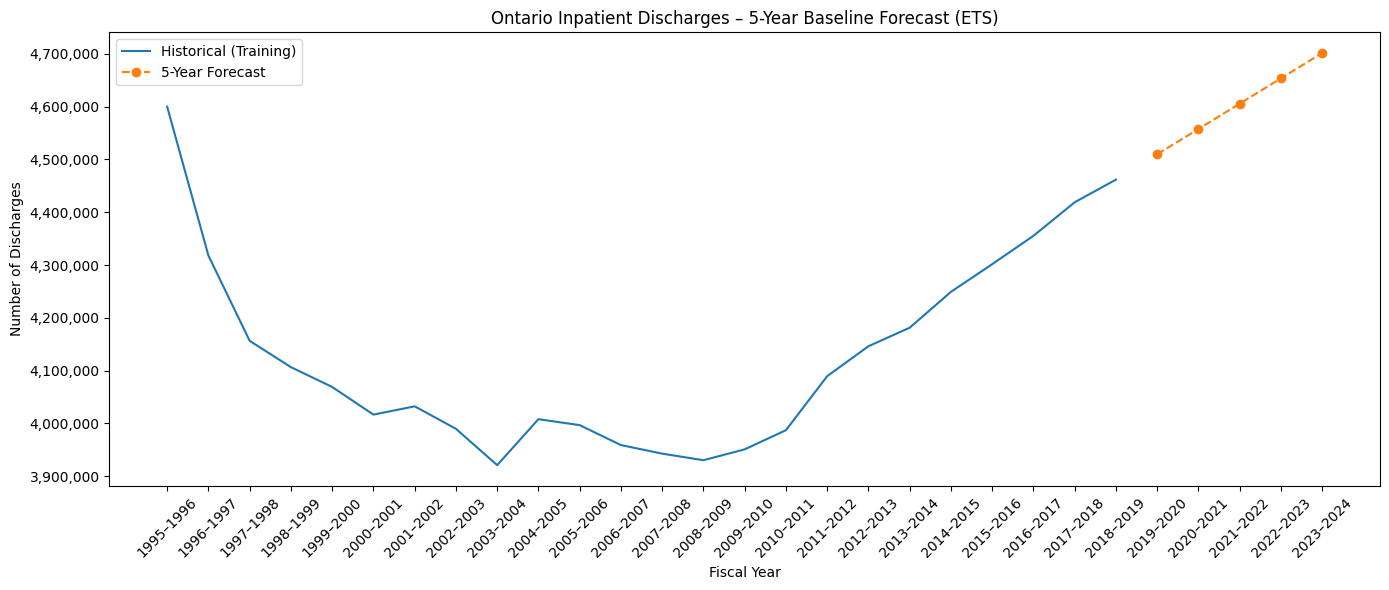

,Fiscal_Year,Forecast_Discharges
0,2019–2020,4.509635e+06
1,2020–2021,4.557594e+06
2,2021–2022,4.605553e+06
3,2022–2023,4.653513e+06
4,2023–2024,4.701472e+06


In [28]:
plt.figure(figsize=(14,6))
plt.plot(train_data["Fiscal_Year"], train_data["Number_of_Discharges"], label="Historical (Training)")
plt.plot(forecast_df["Fiscal_Year"], forecast_df["Forecast_Discharges"],
         linestyle="--", marker="o", label="5-Year Forecast")

plt.title("Ontario Inpatient Discharges – 5-Year Baseline Forecast (ETS)")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Discharges")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
plt.legend()
plt.tight_layout()
plt.show()

forecast_df

Using pre-COVID data, a trend-based ETS model was fitted to Ontario inpatient discharges. The resulting forecast indicates a steady increase in demand over the next five years, consistent with long-term growth observed prior to the pandemic. This projection represents a baseline scenario and is intended to support planning discussions rather than predict post-pandemic utilisation.

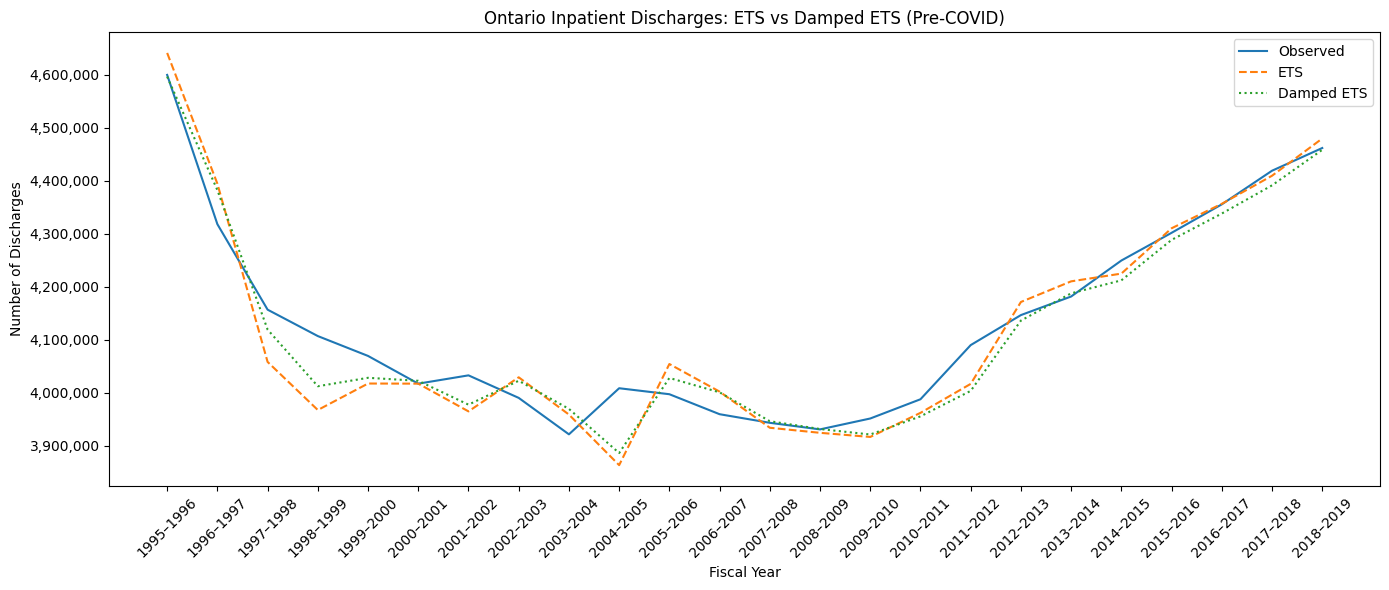

In [29]:
# Fit standard ETS
ets = ExponentialSmoothing(
    train_data["Number_of_Discharges"],
    trend="add",
    seasonal=None
).fit()

# Fit damped ETS
ets_damped = ExponentialSmoothing(
    train_data["Number_of_Discharges"],
    trend="add",
    damped_trend=True,
    seasonal=None
).fit()

# Add fitted values
train_data["ETS_Fitted"] = ets.fittedvalues
train_data["ETS_Damped_Fitted"] = ets_damped.fittedvalues

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(train_data["Fiscal_Year"], train_data["Number_of_Discharges"], label="Observed")
plt.plot(train_data["Fiscal_Year"], train_data["ETS_Fitted"], linestyle="--", label="ETS")
plt.plot(train_data["Fiscal_Year"], train_data["ETS_Damped_Fitted"], linestyle=":", label="Damped ETS")

plt.title("Ontario Inpatient Discharges: ETS vs Damped ETS (Pre-COVID)")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Discharges")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
plt.legend()
plt.tight_layout()
plt.show()

A damped-trend ETS model was estimated as a sensitivity check. The fitted values closely align with those of the baseline ETS model, indicating that forecast results are robust to alternative trend assumptions. As the damped specification does not materially alter the historical fit or projected direction of demand, the simpler ETS model is retained as the primary forecasting approach.

Parameter convergence warnings did not affect fitted values or the relative comparison between models.

##Limitations

This analysis is based on historical inpatient discharge data and is intended to provide a baseline projection of demand under normal operating conditions. The forecast assumes that long-term structural trends observed prior to the COVID-19 pandemic continue without major disruption. It does not account for future policy changes, capacity expansions, workforce shortages, technological shifts, or unexpected public health events.

The model uses annual data, which limits the ability to capture short-term fluctuations within a year. In addition, discharge volume is used as a proxy for system load and does not reflect case complexity or acuity. As a result, the forecasts should be interpreted as indicative of overall demand pressure rather than precise operational targets.

##Planning and Policy Implications

The baseline forecast for Ontario indicates a continued gradual increase in inpatient demand over the medium term. This suggests that, even in the absence of major shocks, pressure on hospital capacity is likely to persist. Planning efforts should therefore assume steady growth in inpatient activity and account for this in workforce planning, bed capacity, and resource allocation.

The divergence between the baseline forecast and observed volumes during the COVID-19 period highlights the importance of scenario planning. Health system planners should complement baseline forecasts with contingency scenarios that consider potential disruptions, rather than relying on a single projection. The results reinforce the need for flexible capacity planning that can adapt to both long-term structural trends and short-term shocks.

##Conclusion

This project analysed long-term inpatient hospital discharge patterns in Canada, with a focused case study on Ontario. Exploratory analysis identified stable pre-COVID trends and a clear structural disruption during the pandemic period. A trend-based ETS model was fitted using pre-COVID data to generate a five-year baseline forecast for Ontario.

The results indicate that inpatient demand in Ontario follows a gradual upward trajectory under normal conditions. Sensitivity analysis using a damped trend specification confirmed that the findings are robust to alternative modelling assumptions. While the forecast does not predict post-pandemic utilisation, it provides a credible baseline to support medium-term planning discussions.

Overall, the project demonstrates how transparent, conservative forecasting methods can be used to inform healthcare planning while acknowledging uncertainty and system complexity.